In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv(r"C:\Users\zahri\anaconda_projects\AsaiProjekt\Asai-Projekt\heart.csv")
df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/heart2.csv")

styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

print(f"Anzahl der Zeilen (Patienten): {df.shape[0]}")
print(f"Anzahl der Spalten (Features): {df.shape[1]}")
# Ersten Blick auf die Daten werfen
#print(df.head())             # Zeigt die ersten 5 Zeilen
#print(df.info())             # Gibt Datentypen und Nullwerte an
#print(df.describe())         # Statistische Übersicht (Mittelwert, Std., etc.)

# Optional: Spaltennamen anzeigen
print("Spalten:", df.columns.tolist())
print(df.head())
print(df.columns)


Anzahl der Zeilen (Patienten): 918
Anzahl der Spalten (Features): 12
Spalten: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0  

NameError: name 'Index' is not defined

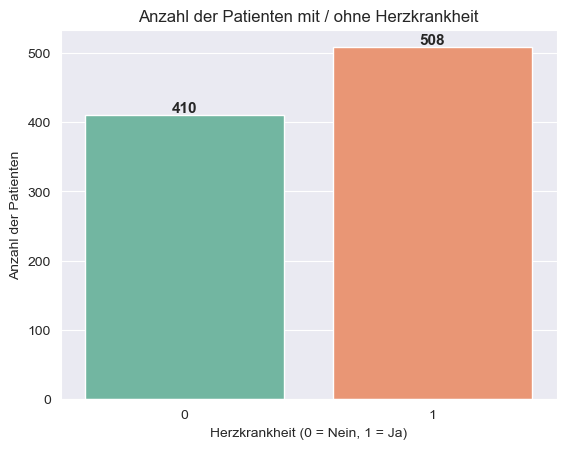

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Balkendiagramm OHNE FutureWarning
ax = sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette='Set2', legend=False)


# Achsentitel
plt.title('Anzahl der Patienten mit / ohne Herzkrankheit')
plt.xlabel('Herzkrankheit (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl der Patienten')

# Zahlen über Balken schreiben
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Plot anzeigen
plt.show()

In [12]:
# Ausreißer suchen

# Welche Altersbereiche gibt es?
print("Alter (min/max):", df['Age'].min(), df['Age'].max())

# Extrem hohe/niedrige Cholesterinwerte
print(df[df['Cholesterol'] > 600])
print(df[df['Cholesterol'] < 100])

# Maximalpuls über physiologisch plausibler Grenze?
print(df[df['MaxHR'] > 220])

# Negative Oldpeak-Werte (sollten nicht vorkommen)
print(df[df['Oldpeak'] < 0])


Alter (min/max): 28 77
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
149   54   M           ASY        130          603          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
149    125              Y      1.0     Flat             1  
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
98    56   M           ASY        120           85          0     Normal   
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M        

🔍 Genauigkeit: 0.875

🧾 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



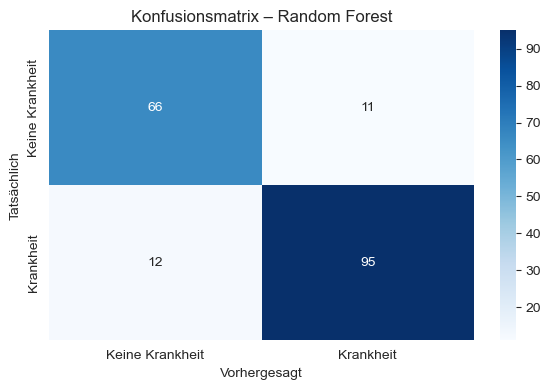

 False Negatives – Krank, aber als gesund erkannt:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
655   40   M           ASY        152          223          0     Normal   
759   54   M           ATA        192          283          0        LVH   
650   48   M           ASY        130          256          1        LVH   
861   65   M           ASY        110          248          0        LVH   
375   73   F           NAP        160            0          0         ST   
334   51   M           ASY        130            0          1     Normal   
662   44   M           ASY        110          197          0        LVH   
120   47   F           NAP        135          248          1     Normal   
548   66   M           ASY        112          261          0     Normal   
652   59   M            TA        160          273          0        LVH   
816   58   M           ASY        125          300          0        LVH   
684   47   M           NAP        108

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# 2. Features und Zielspalte trennen
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# 3. Kategorische Variablen in numerische umwandeln
X = pd.get_dummies(X, drop_first=True)

# 4. Skalieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Modelltraining
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Vorhersage & Bewertung
y_pred = model.predict(X_test)
print("🔍 Genauigkeit:", accuracy_score(y_test, y_pred))
print("\n🧾 Klassifikationsbericht:\n", classification_report(y_test, y_pred))
# 8. Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Keine Krankheit', 'Krankheit']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix – Random Forest')
plt.tight_layout()
plt.show()

# 10. Fehleranalyse: False Negatives
results = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': y_pred
}, index=y_test.index)

false_negatives = results[(results['y_true'] == 1) & (results['y_pred'] == 0)]
print(" False Negatives – Krank, aber als gesund erkannt:")
print(df.loc[false_negatives.index])

In [18]:
def remove_duplicates_keep_first(df):
    seen = set()                # Set für eindeutige Zeilen (als Tupel)
    duplicate_indices = []      # Liste für Duplikat-Indizes
    indices_to_drop = []        # Indizes, die wir löschen wollen

    for idx, row in df.iterrows():
        row_tuple = tuple(row)  # Zeile als Tupel (Index wird nicht mitgenommen, nur Spalten)
        if row_tuple in seen:
            indices_to_drop.append(idx)  # markiere als Duplikat
            duplicate_indices.append(idx)
        else:
            seen.add(row_tuple)

    # DataFrame ohne Duplikate zurückgeben
    df_clean = df.drop(index=indices_to_drop).reset_index(drop=True)

    print(f"Anzahl entfernte Duplikate: {len(indices_to_drop)}")
    print(f"Duplikate wurden bei Indizes entfernt: {duplicate_indices}")

    return df_clean, duplicate_indices

# Anwendung auf dein DataFrame
df_clean, duplikat_liste = remove_duplicates_keep_first(df)



Anzahl entfernte Duplikate: 0
Duplikate wurden bei Indizes entfernt: []


In [23]:
# Anzahl der Duplikate anzeigen
anzahl_duplikate = df.duplicated().sum()
print(f"🔍 Anzahl gefundener Duplikate: {anzahl_duplikate}")

# Entfernen
df = df.drop_duplicates()

🔍 Anzahl gefundener Duplikate: 0


In [42]:
# Fehlende Werte pro Spalte anzeigen
print(df.isnull().sum())

# Beispiel: Fehlende Werte entfernen
df_clean = df.dropna()

# Fehlende Werte in numerischen Spalten mit Median füllen
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)  # Zuweisung ohne inplace

# Fehlende Werte in kategorischen Spalten mit Modus füllen
for col in df.select_dtypes(include=['object', 'category']).columns:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)  # Zuweisung ohne inplace

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


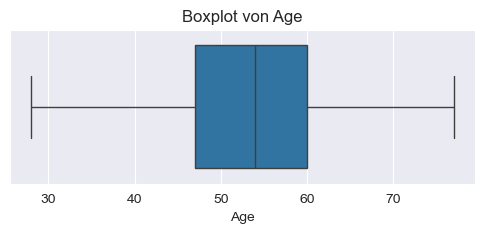

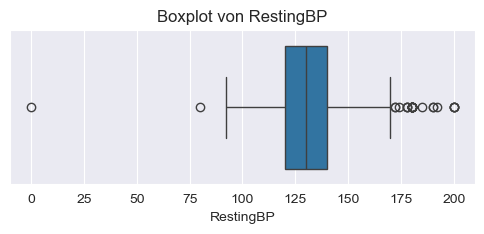

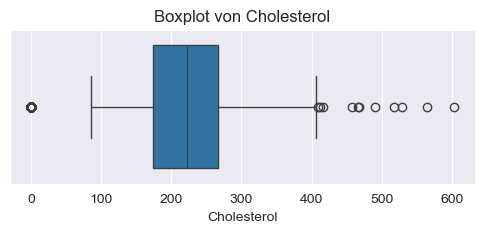

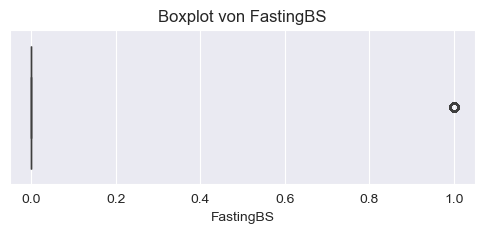

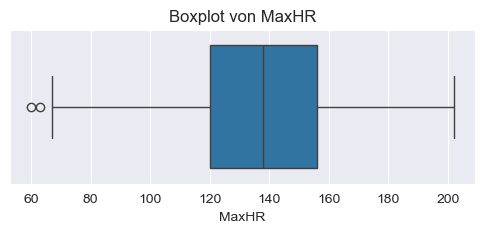

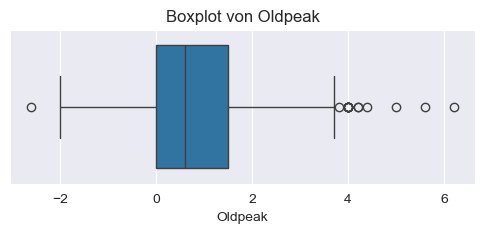

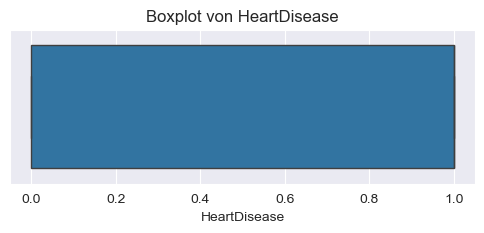

Ausreißer in Cholesterol:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  


In [45]:
#Ausreißer
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot pro numerischer Spalte
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot von {col}')
    plt.show()

# Statistisch Ausreißer nach IQR-Methode (Beispiel für eine Spalte)
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Cholesterol'] < Q1 - 1.5 * IQR) | (df['Cholesterol'] > Q3 + 1.5 * IQR)]
print("Ausreißer in Cholesterol:\n", outliers)


In [47]:
# Korrelationsmatrix (nur numerische Features)
corr_matrix = df.corr()

# Heatmap anzeigen
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

# Stark korrelierende Paare (z.B. > 0.8)
high_corr = [(col, corr_matrix[col].idxmax(), corr_matrix[col].max()) for col in corr_matrix.columns if abs(corr_matrix[col].max()) > 0.8 and corr_matrix[col].max() < 1]
print("Stark korrelierende Paare:", high_corr)

ValueError: could not convert string to float: 'Up'

🔍 Genauigkeit: 0.875

🧾 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



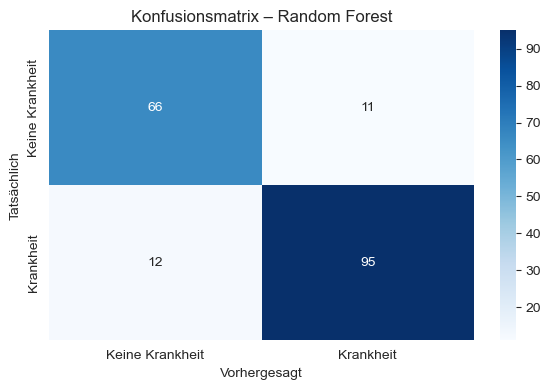

❌ False Negatives – Krank, aber als gesund erkannt:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
655   40   M           ASY        152          223          0     Normal   
759   54   M           ATA        192          283          0        LVH   
650   48   M           ASY        130          256          1        LVH   
861   65   M           ASY        110          248          0        LVH   
375   73   F           NAP        160            0          0         ST   
334   51   M           ASY        130            0          1     Normal   
662   44   M           ASY        110          197          0        LVH   
120   47   F           NAP        135          248          1     Normal   
548   66   M           ASY        112          261          0     Normal   
652   59   M            TA        160          273          0        LVH   
816   58   M           ASY        125          300          0        LVH   
684   47   M           NAP        10

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- 0. Duplikate entfernen (Index wird ignoriert) ---
df = df.drop_duplicates().reset_index(drop=True)

# --- 1. Features und Ziel trennen ---
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# --- 2. Kategorische Variablen in numerische via One-Hot-Encoding ---
X = pd.get_dummies(X, drop_first=True)

# --- 3. Skalieren ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Trainings- und Testdaten aufteilen ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- 5. Random Forest Modell trainieren ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 6. Vorhersagen machen ---
y_pred = model.predict(X_test)

# --- 7. Auswertung ---
print("🔍 Genauigkeit:", accuracy_score(y_test, y_pred))
print("\n🧾 Klassifikationsbericht:\n", classification_report(y_test, y_pred))

# --- 8. Konfusionsmatrix plotten ---
cm = confusion_matrix(y_test, y_pred)
labels = ['Keine Krankheit', 'Krankheit']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix – Random Forest')
plt.tight_layout()
plt.show()

# --- 9. Fehleranalyse: False Negatives ---
results = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': y_pred
}, index=y_test.index)

false_negatives = results[(results['y_true'] == 1) & (results['y_pred'] == 0)]
print("❌ False Negatives – Krank, aber als gesund erkannt:")
print(df.loc[false_negatives.index])


🔍 Genauigkeit: 0.8820754716981132

🧾 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        90
           1       0.89      0.90      0.90       122

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



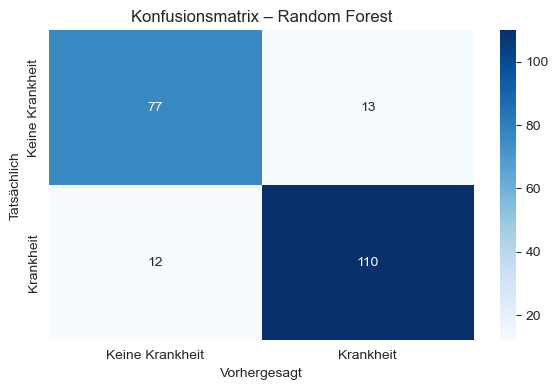

❌ False Negatives – Krank, aber als gesund erkannt:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
655   40   M           ASY        152          223          0     Normal   
759   54   M           ATA        192          283          0        LVH   
650   48   M           ASY        130          256          1        LVH   
861   65   M           ASY        110          248          0        LVH   
375   73   F           NAP        160            0          0         ST   
662   44   M           ASY        110          197          0        LVH   
120   47   F           NAP        135          248          1     Normal   
548   66   M           ASY        112          261          0     Normal   
652   59   M            TA        160          273          0        LVH   
816   58   M           ASY        125          300          0        LVH   
684   47   M           NAP        108          243          0     Normal   
916   57   F           ATA        13

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- 0. Duplikate entfernen (Index wird ignoriert) ---
df = df.drop_duplicates().reset_index(drop=True)

# --- 1. Features und Ziel trennen ---
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# --- 2. Kategorische Variablen in numerische via One-Hot-Encoding ---
X = pd.get_dummies(X, drop_first=True)

# --- 3. Skalieren ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Trainings- und Testdaten aufteilen ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.23, random_state=42
)

# --- 5. Random Forest Modell trainieren ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 6. Vorhersagen machen ---
y_pred = model.predict(X_test)

# --- 7. Auswertung ---
print("🔍 Genauigkeit:", accuracy_score(y_test, y_pred))
print("\n🧾 Klassifikationsbericht:\n", classification_report(y_test, y_pred))

# --- 8. Konfusionsmatrix plotten ---
cm = confusion_matrix(y_test, y_pred)
labels = ['Keine Krankheit', 'Krankheit']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix – Random Forest')
plt.tight_layout()
plt.show()

# --- 9. Fehleranalyse: False Negatives ---
results = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': y_pred
}, index=y_test.index)

false_negatives = results[(results['y_true'] == 1) & (results['y_pred'] == 0)]
print("❌ False Negatives – Krank, aber als gesund erkannt:")
print(df.loc[false_negatives.index])

print(model.get_params())

🔍 Genauigkeit: 0.8773584905660378

🧾 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        90
           1       0.89      0.90      0.89       122

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.88      0.88      0.88       212



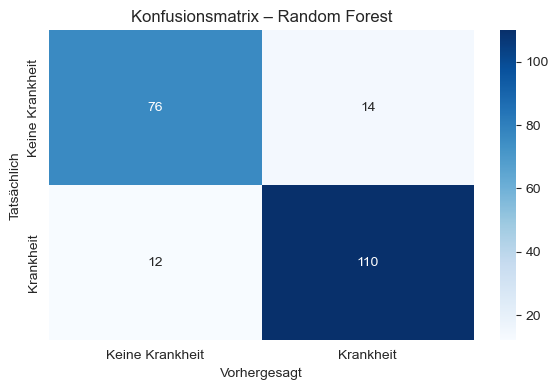

❌ False Negatives – Krank, aber als gesund erkannt:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
655   40   M           ASY        152          223          0     Normal   
759   54   M           ATA        192          283          0        LVH   
650   48   M           ASY        130          256          1        LVH   
861   65   M           ASY        110          248          0        LVH   
375   73   F           NAP        160            0          0         ST   
334   51   M           ASY        130            0          1     Normal   
662   44   M           ASY        110          197          0        LVH   
548   66   M           ASY        112          261          0     Normal   
652   59   M            TA        160          273          0        LVH   
816   58   M           ASY        125          300          0        LVH   
684   47   M           NAP        108          243          0     Normal   
916   57   F           ATA        13

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- 0. Duplikate entfernen (Index wird ignoriert) ---
df = df.drop_duplicates().reset_index(drop=True)

# --- 1. Features und Ziel trennen ---
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# --- 2. Kategorische Variablen in numerische via One-Hot-Encoding ---
X = pd.get_dummies(X, drop_first=True)

# --- 3. Skalieren ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Trainings- und Testdaten aufteilen ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.23, random_state=42
)

# --- 5. Random Forest Modell mit erweiterten Hyperparametern ---
model = RandomForestClassifier(
    n_estimators=100,          # Anzahl Bäume (Standard ist 100)
    max_depth=10,              # maximale Tiefe eines Baumes (None = keine Begrenzung)
    min_samples_split=5,       # min. Samples um einen Knoten zu teilen
    min_samples_leaf=2,        # min. Samples in einem Blatt
    max_features='sqrt',       # Anzahl Features für Split (sqrt = Standard bei Klassifikation)
    bootstrap=True,            # Bootstrapping verwenden
    random_state=42            # für Reproduzierbarkeit
)
model.fit(X_train, y_train)

# --- 6. Vorhersagen machen ---
y_pred = model.predict(X_test)

# --- 7. Auswertung ---
print("🔍 Genauigkeit:", accuracy_score(y_test, y_pred))
print("\n🧾 Klassifikationsbericht:\n", classification_report(y_test, y_pred))

# --- 8. Konfusionsmatrix plotten ---
cm = confusion_matrix(y_test, y_pred)
labels = ['Keine Krankheit', 'Krankheit']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix – Random Forest')
plt.tight_layout()
plt.show()

# --- 9. Fehleranalyse: False Negatives ---
results = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': y_pred
}, index=y_test.index)

false_negatives = results[(results['y_true'] == 1) & (results['y_pred'] == 0)]
print("❌ False Negatives – Krank, aber als gesund erkannt:")
print(df.loc[false_negatives.index])


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

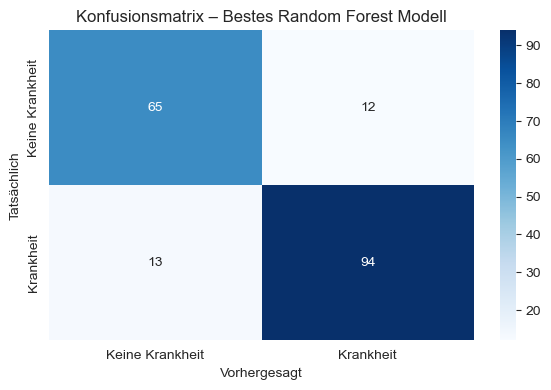

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Daten vorbereiten (wie gehabt)
df = df.drop_duplicates().reset_index(drop=True)
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Parameter-Raum definieren
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Random Forest Modell (ohne Parameter, die GridSearch regelt)
rf = RandomForestClassifier(random_state=42)

# GridSearchCV initialisieren
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5,  # 5-fache Kreuzvalidierung
                           scoring='accuracy',
                           n_jobs=-1,  # nutzt alle verfügbaren CPUs
                           verbose=2)

# Grid Search fitten
grid_search.fit(X_train, y_train)

# Bestes Modell und Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)
print("Beste Genauigkeit (CV):", grid_search.best_score_)

# Bestes Modell auf Testdaten evaluieren
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Testgenauigkeit:", accuracy_score(y_test, y_pred))
print("\nKlassifikationsbericht:\n", classification_report(y_test, y_pred))

# Konfusionsmatrix plotten (optional)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = ['Keine Krankheit', 'Krankheit']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix – Bestes Random Forest Modell')
plt.tight_layout()
plt.show()



Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

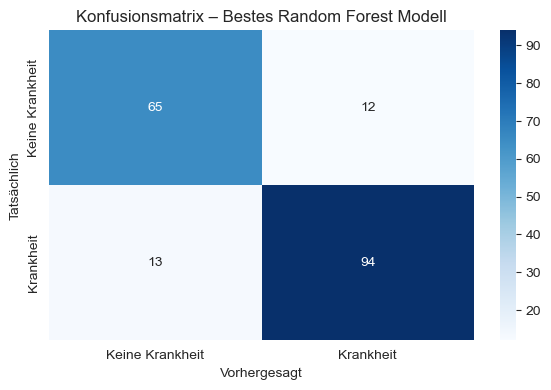


❌ Anzahl falsch klassifizierter Beispiele: 25

Falsch klassifizierte Beispiele (Originaldaten):
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
773   56   M            TA        120          193          0        LVH   
768   64   F           ASY        130          303          0     Normal   
39    48   F           ASY        150          227          0     Normal   
822   58   M           NAP        105          240          0        LVH   
655   40   M           ASY        152          223          0     Normal   
679   63   M            TA        145          233          1        LVH   
826   51   M           NAP        125          245          1        LVH   
758   51   M            TA        125          213          0        LVH   
759   54   M           ATA        192          283          0        LVH   
650   48   M           ASY        130          256          1        LVH   
634   40   M            TA        140          199          0     N

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Daten vorbereiten ---
df = df.drop_duplicates().reset_index(drop=True)
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Parameter-Raum für GridSearch ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# --- Modell und GridSearchCV ---
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# --- GridSearch fitten ---
grid_search.fit(X_train, y_train)

# --- Bestes Modell und Parameter ---
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("\n✅ Beste Parameter gefunden durch GridSearchCV:")
for param, val in best_params.items():
    print(f" - {param}: {val}")
print(f"Beste Kreuzvalidierungs-Genauigkeit: {best_score:.4f}")

# --- Testdaten mit bestem Modell vorhersagen ---
y_pred = best_model.predict(X_test)

print("\n📊 Testdaten-Auswertung mit bestem Modell:")
print(f"Testgenauigkeit: {accuracy_score(y_test, y_pred):.4f}")
print("\nKlassifikationsbericht:\n", classification_report(y_test, y_pred))

# --- Konfusionsmatrix plotten ---
cm = confusion_matrix(y_test, y_pred)
labels = ['Keine Krankheit', 'Krankheit']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix – Bestes Random Forest Modell')
plt.tight_layout()
plt.show()

# Vorhersagen auf Testdaten
y_pred = best_model.predict(X_test)

# Ergebnisse in DataFrame packen, Index bleibt erhalten
results = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': y_pred
}, index=y_test.index)

# Falsch klassifizierte Beispiele filtern (alles, wo y_true != y_pred)
misclassified = results[results['y_true'] != results['y_pred']]

print(f"\n❌ Anzahl falsch klassifizierter Beispiele: {len(misclassified)}")
print("\nFalsch klassifizierte Beispiele (Originaldaten):")
print(df.loc[misclassified.index])